# SUPERVISED LEARNING

# Bagging vs Random Forest

## Decision Tree Composition

We will nead:
- sklearn
- matplotlib
    

In this example we will work with _digits_ dataset from sklearn library to compare some of the most popular algorithm of Composition of Decision Tree classifiers and study how their parameters affect.

### Data Load

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import model_selection, tree, metrics, ensemble

In [3]:
from sklearn.datasets import load_digits
digits = load_digits() 

In [4]:
#print(digits.DESCR)
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

<Figure size 432x288 with 0 Axes>

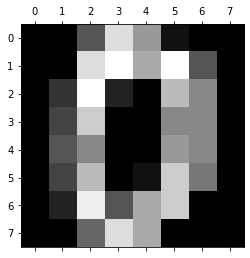

In [5]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [6]:
# Features Matrix that contains weight from each pixel by 16 gris scale

X = digits.data
print('images', digits.images.shape)   # 2D images 8x8
print('data', digits.data.shape)       # 1D 1x64
#X[0] 

images (1797, 8, 8)
data (1797, 64)


In [7]:
# Targe matrix contains numbers representing by each image

print(digits.target_names)
y = digits.target
y.shape

[0 1 2 3 4 5 6 7 8 9]


(1797,)

## 1. One Decision Tree

We start from apply Decision Tree classifier from sklearn, with default settings.

#### Train/ Test size = 0.75/ 0.25

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 1)

In [9]:
# Default configuration

clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [10]:
# Accuracy score

y_pred = clf.predict(X_test)
print('Score:', metrics.accuracy_score(y_test, y_pred))

Score: 0.84


#### Cross Validation

In [11]:
from sklearn.model_selection import cross_val_score as CVS

In [12]:
clf = tree.DecisionTreeClassifier(random_state=1)
print('Score:', CVS(clf, X, y, cv =5).mean())    # although cv = 5 is enough
# use stratifield fold by default!  se queja si en una clase hay menos objetos que cv

Score: 0.7880720488447157


## 2. Bagging

### 2.1 Training using all features

We will use the _BaggingClassifier_ from sklearn.ensemble to train bagging on the _DecisionTreeClassifier,_ with the number of trees = 100.

In [13]:
from sklearn.ensemble import BaggingClassifier as BC

#### Train/ Test size = 0.75/ 0.25

In [14]:
bagging = BC(clf, n_estimators = 100, random_state=1) 

In [15]:
bagging.fit(X_train, y_train) 

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

In [16]:
print('Score:', bagging.score(X_test, y_test))

Score: 0.9511111111111111


#### Cross Validation

In [17]:
bagging = BC(clf, n_estimators = 100, random_state=1)   # all samples, all features

In [18]:
print('Score:', CVS(bagging, X, y, cv =5).mean())

Score: 0.9098772275428939


### 2.2. OUT-OF-BAG estimate

In [19]:
bagging = BC(clf, max_features=0.5, max_samples=0.5, n_estimators = 100, oob_score=True, random_state=1)

In [20]:
bagging.fit(X, y) 

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

In [21]:
print('Score:', bagging.oob_score_)     # OUT-OF-BAG estimate score

Score: 0.9699499165275459


### 2.3. Random choice of features in each tree

Now we select the parameters of Bagging Classifier that: each basic algorithm is not learning at all features $d$, so is learning randomly on $√d$ features. $√d$ is the heuristic of frequent use in classification problems; in regression problems, often is $d/3$

In [22]:
bagging = BC(clf, max_features=int(sqrt(X.shape[1])), n_estimators = 100, random_state=1)

In [23]:
print('Score:', CVS(bagging, X, y, cv =5).mean() )

Score: 0.9215126722808261


### 2.4. Random choice of features in each node

Finally, let's try to choose random features not once on the whole tree, but each time we construct each node of the tree.

In [24]:
clf2 = tree.DecisionTreeClassifier(max_features = 'sqrt', random_state=1)

In [25]:
bagging = BC(clf2, n_estimators = 100, random_state=1)  # = almost RandomForest Algorithm

In [26]:
print('Score:', CVS(bagging, X, y, cv =5).mean())

Score: 0.9388277005769782


The obtained classifier is Bagging on randomized trees. This corresponds exactly to the Random Forest algorithm, so why not compare the quality of this classifier with _RandomForestClassifier_ from sklearn.ensemble?

## 3. Random Forest

In [27]:
RF_clf = ensemble.RandomForestClassifier(n_estimators = 100, min_samples_leaf=5, random_state = 1)
# q = sqrt(n_features) by default
# bootstrap : default=True
# max_depth = max
# min_samples_split : default=2

In [28]:
print('Score:', CVS(RF_clf, X, y, cv =5).mean())

Score: 0.9237967532453629


Let's study, how the quality of classification on a given dataset depends on the number of trees, the number of features selected during the construction of each tree top, as well as restrictions on the depth of the tree.

In [29]:
cv_max_depth = CVS(RF_clf, X, y, cv =5).mean() 

### 3.1. max_depth 

In [30]:
depth = np.arange(2, 14, 2)
cv_depth = np.zeros(depth.shape[0])
i = 0
for p in depth:
    RF_clf = ensemble.RandomForestClassifier(n_estimators = 100, max_depth = p, min_samples_leaf=5, random_state = 1)
    cv_depth[i] = CVS(RF_clf, X, y, cv =5).mean()
    i = i+1    

Text(0.5, 1.0, 'Score/ max_depth')

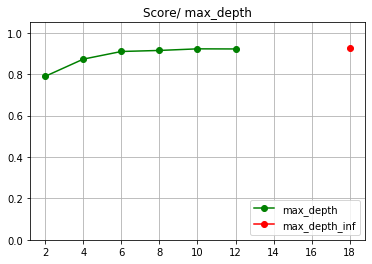

In [31]:
pylab.grid(True)
pylab.plot(depth, cv_depth, 'g-', marker='o', label='max_depth')
pylab.plot(18, cv_max_depth, 'r-', marker='o', label='max_depth_inf')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')
pylab.title('Score/ max_depth')

From max_depth = 8, the estimate score barely changes.
With a small maximum depth of trees (5-6), the quality of the random forest is noticeably worse than without restrictions, because trees turn out to be untrained. With increasing depth, the quality first improves, and then does not change significantly (from max_depth = 8) due to the averaging of forecasts and differences between trees, their overtraining in bagging does not affect the final quality (all trees are differently converted, and when averaging, they compensate for overtraining of each other).

### 3.2. n_trees

In [32]:
ntrees = np.arange(2, 112, 10)
cv_ntrees = np.zeros(ntrees.shape[0])
i = 0
for n in ntrees:
    RF_clf = ensemble.RandomForestClassifier(n_estimators = n, max_depth = 6, min_samples_leaf=5, random_state = 1)
    cv_ntrees[i] = CVS(RF_clf, X, y, cv =5).mean()
    i = i+1 

Text(0.5, 1.0, 'Score/ n_trees')

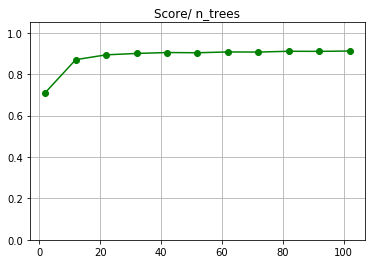

In [33]:
pylab.grid(True)
pylab.plot(ntrees, cv_ntrees, 'g-', marker='o')
pylab.ylim((0.0, 1.05))
pylab.title('Score/ n_trees')

With the increase in the number of trees in a random forest, at some point the trees (n_trees = 30) become enough for a high quality classification, and then the quality does not change significantly.

### 3.3. max_features

In [34]:
n_feat = np.arange(4, 65, 4)
cv_feat = np.zeros(n_feat.shape[0])
i = 0
for n in n_feat:
    RF_clf = ensemble.RandomForestClassifier(n_estimators = 30, max_depth = 6, max_features = n, min_samples_leaf = 5, \
                                             random_state = 1)
    cv_feat[i] = CVS(RF_clf, X, y, cv =5).mean()
    i = i+1 

Text(0.5, 1.0, 'Score/ max_features')

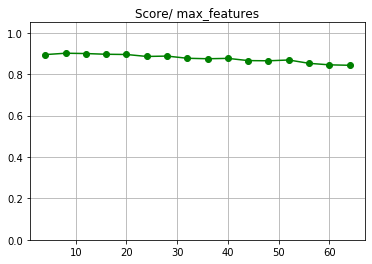

In [35]:
pylab.grid(True)
pylab.plot(n_feat, cv_feat, 'g-', marker='o')
pylab.ylim((0.0, 1.05))
pylab.title('Score/ max_features')

When a large number of features (for a given dataset - 40, 50) the quality of classification becomes worse than with a small number of features (√(d)...d/3). This is due to the fact that the fewer features are selected in each node, the more different the trees are (because the trees are very unstable to changes in the training set), and the better their composition works.